# Assignment 7 - Text Mining
## Data Mining

by Ardian - 2106638173

April 6th, 2024

Information System - Faculty of Computer Science

Universitas Indonesia

---

## Libraries

In [1]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/var/folders/df/r0jnfybd0ds0g6kknxpgdxb00000gn/T/ipykernel_41618/2992998267.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Dataset (raw texts)

In [2]:
texts = [
    "Masyarakat bersiap menyambut Lebaran dengan penuh harap dan kegembiraan.",
    "Indonesia menang 3 gol tanpa balas melawan Vietnam.",
    "Korupsi timah merugikan negara Indonesia 271 Triliun.",
    "Libur lebaran akan dimulai pada tanggal 6 April 2024.",
    "Perkembangan teknologi kecerdasan buatan sangat cepat.",
    "Saya makan nasi goreng untuk buka puasa.",
    "Indonesia berpeluang lolos ke Piala Dunia 2026."
]

texts

['Masyarakat bersiap menyambut Lebaran dengan penuh harap dan kegembiraan.',
 'Indonesia menang 3 gol tanpa balas melawan Vietnam.',
 'Korupsi timah merugikan negara Indonesia 271 Triliun.',
 'Libur lebaran akan dimulai pada tanggal 6 April 2024.',
 'Perkembangan teknologi kecerdasan buatan sangat cepat.',
 'Saya makan nasi goreng untuk buka puasa.',
 'Indonesia berpeluang lolos ke Piala Dunia 2026.']

## Text Pre-processing

### Lowercase the texts:

In [3]:
texts_lowered = []
for text in texts:
    texts_lowered.append(text.lower())

texts_lowered

['masyarakat bersiap menyambut lebaran dengan penuh harap dan kegembiraan.',
 'indonesia menang 3 gol tanpa balas melawan vietnam.',
 'korupsi timah merugikan negara indonesia 271 triliun.',
 'libur lebaran akan dimulai pada tanggal 6 april 2024.',
 'perkembangan teknologi kecerdasan buatan sangat cepat.',
 'saya makan nasi goreng untuk buka puasa.',
 'indonesia berpeluang lolos ke piala dunia 2026.']

### Remove punctuations:

In [4]:
texts_nopunctuation = []
for text in texts_lowered:
    text_nopunctuation = ''.join(char for char in text if char not in set(string.punctuation))
    texts_nopunctuation.append(text_nopunctuation)

texts_nopunctuation

['masyarakat bersiap menyambut lebaran dengan penuh harap dan kegembiraan',
 'indonesia menang 3 gol tanpa balas melawan vietnam',
 'korupsi timah merugikan negara indonesia 271 triliun',
 'libur lebaran akan dimulai pada tanggal 6 april 2024',
 'perkembangan teknologi kecerdasan buatan sangat cepat',
 'saya makan nasi goreng untuk buka puasa',
 'indonesia berpeluang lolos ke piala dunia 2026']

### Remove stop words:

In [5]:
stopwords_file = "stop-words_bahasa.txt"
stopwords = []
with open(stopwords_file, "r", encoding="utf-8") as f:
    for word in f:
        stopwords.append(word.strip())

texts_nostopwords = []
for text in texts_nopunctuation:
    filtered_text = ' '.join(word for word in text.split() if word not in stopwords)
    texts_nostopwords.append(filtered_text)

texts_nostopwords

['masyarakat menyambut lebaran penuh harap kegembiraan',
 'indonesia menang 3 gol balas melawan vietnam',
 'korupsi timah merugikan negara indonesia 271 triliun',
 'libur lebaran tanggal 6 april 2024',
 'perkembangan teknologi kecerdasan buatan cepat',
 'makan nasi goreng buka puasa',
 'indonesia berpeluang lolos piala dunia 2026']

> Saya tidak menghilangkan angka dan menyederhanakan kata ke bentuk dasarnya (stem) untuk mempertahankan informasi kalimat-kalimat, mumpung hanya 7 kalimat.

## TF-IDF

### Tokenize the texts:

In [6]:
tokenized_texts = []
for text in texts_nostopwords:
    tokenized_texts.append(text.lower().split())

vocabularies = set()
for text in tokenized_texts:
    for word in text:
        vocabularies.add(word)
vocabularies = list(vocabularies)

### Calculate TFI-DF:

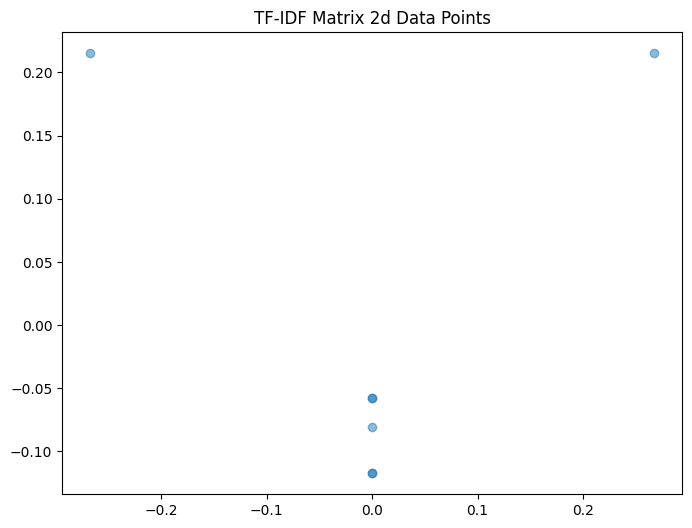

,3,negara,dunia,makan,indonesia,penuh,lebaran,vietnam,timah,buatan,...,tanggal,6,april,melawan,271,libur,teknologi,kegembiraan,harap,2024
0,0.000000,0.000000,0.00000,0.00000,0.000000,0.14085,0.090678,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.14085,0.14085,0.00000
1,0.120728,0.000000,0.00000,0.00000,0.052568,0.00000,0.000000,0.120728,0.000000,0.00000,...,0.00000,0.00000,0.00000,0.120728,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.000000,0.120728,0.00000,0.00000,0.052568,0.00000,0.000000,0.000000,0.120728,0.00000,...,0.00000,0.00000,0.00000,0.000000,0.120728,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.090678,0.000000,0.000000,0.00000,...,0.14085,0.14085,0.14085,0.000000,0.000000,0.14085,0.00000,0.00000,0.00000,0.14085
4,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.16902,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.16902,0.00000,0.00000,0.00000
5,0.000000,0.000000,0.00000,0.16902,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
6,0.000000,0.000000,0.14085,0.00000,0.061329,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000


In [7]:
# TF:
tf = np.zeros((len(texts_nostopwords), len(vocabularies)))
for i, text in enumerate(tokenized_texts):
    total_terms = len(text)
    for j, word in enumerate(vocabularies):
        word_count = 0
        for token in text:
            if token == word:
                word_count += 1
        tf[i, j] = word_count / total_terms

# IDF:
idf = np.zeros(len(vocabularies))
total_texts = len(texts_nostopwords)
for i, term in enumerate(vocabularies):
    total_texts_with_term = 0
    for text in tokenized_texts:
        if term in text:
            total_texts_with_term += 1
    idf[i] = np.log10(total_texts / total_texts_with_term)

# TF-IDF:   
tfidf = tf * idf
df_tfidf = pd.DataFrame(tfidf, columns=vocabularies)

# Data points 2d visualization
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf)

plt.figure(figsize=(8, 6))
plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], marker='o', alpha=0.5)
plt.title('TF-IDF Matrix 2d Data Points')
plt.show()

df_tfidf

## Text Clustering

### Euclidean Distance:

In [8]:
def euclidean_distance(point1, point2):
    squared_diff = [(x - y) ** 2 for x, y in zip(point1, point2)]
    sum_squared_diff = sum(squared_diff)
    distance = np.sqrt(sum_squared_diff)
    
    return distance

In [9]:
df = df_tfidf.copy()
df.index = df.index.astype(str)

while len(df) > 1:
    closest_distance = np.inf
    similar_pair = None

    for index, point in df.iterrows():
            for another_index, another_point in df.iterrows():
                if index != another_index:
                    distance = np.linalg.norm(euclidean_distance(point, another_point))
                    if distance < closest_distance:
                        closest_distance = distance
                        similar_pair = [index, another_index]

    merged_point = np.maximum(df.loc[similar_pair[0]], df.loc[similar_pair[1]])
    merged_index = f"({', '.join(similar_pair)})"

    df = df.drop(similar_pair)
    df = pd.concat([df, pd.DataFrame([merged_point], index=[merged_index], columns=df.columns)])

    print(", ".join(df.index))
    print()

0, 3, 4, 5, 6, (1, 2)

4, 5, 6, (1, 2), (0, 3)

5, (1, 2), (0, 3), (4, 6)

(0, 3), (4, 6), (5, (1, 2))

(5, (1, 2)), ((0, 3), (4, 6))

((5, (1, 2)), ((0, 3), (4, 6)))



> Bagian ini yang memakan waktu dan bikin terlambat😭

### Cosine Similarity:

In [10]:
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    similarity = dot_product / (magnitude1 * magnitude2)
    return similarity

In [13]:
df = df_tfidf.copy()
df.index = df.index.astype(str)

while len(df) > 1:
    highest_similarity = -np.inf
    similar_pair = None

    for index, point in df.iterrows():
        for another_index, another_point in df.iterrows():
            if index != another_index:
                similarity = cosine_similarity(point, another_point)
                if similarity > highest_similarity:
                    highest_similarity = similarity
                    similar_pair = [index, another_index]

    merged_point = np.maximum(df.loc[similar_pair[0]], df.loc[similar_pair[1]])
    merged_index = f"({', '.join(similar_pair)})"

    df = df.drop(similar_pair)
    df = pd.concat([df, pd.DataFrame([merged_point], index=[merged_index], columns=df.columns)])

    print(", ".join(df.index))
    print()


1, 2, 4, 5, 6, (0, 3)

2, 4, 5, (0, 3), (1, 6)

4, 5, (0, 3), (2, (1, 6))

(0, 3), (2, (1, 6)), (4, 5)

(4, 5), ((0, 3), (2, (1, 6)))

((4, 5), ((0, 3), (2, (1, 6))))

